In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Defining the datasets and tools
datasets = ['lasry', 'vangalen', 'similie']
tools = ['nn', 'cpdb', 'community']

In [5]:
# Function to read the data from the file and correct the column names
def read_data(dataset, tool):
    file_path = f'./activity_{dataset}_{tool}.txt'
    data = pd.read_csv(file_path, delimiter='\\s+', comment='#')
    # Renaming the columns to remove extra spaces
    data.columns = ['Elapsed_time', 'CPU', 'Real_MB', 'Virtual_MB']
    return data

# # Plotting CPU usage for each tool across the three datasets
# plt.figure(figsize=(15, 5))
# for dataset in datasets:
#     for tool in tools:
#         data = read_data(dataset, tool)
#         plt.plot(data['Elapsed_time'], data['CPU'], label=f'{tool} - {dataset}')
# plt.xlabel('Elapsed Time (seconds)')
# plt.ylabel('CPU Usage (%)')
# plt.legend()
# plt.title('CPU Usage Benchmarking across Tools and Datasets')
# plt.show()

# CPU usage

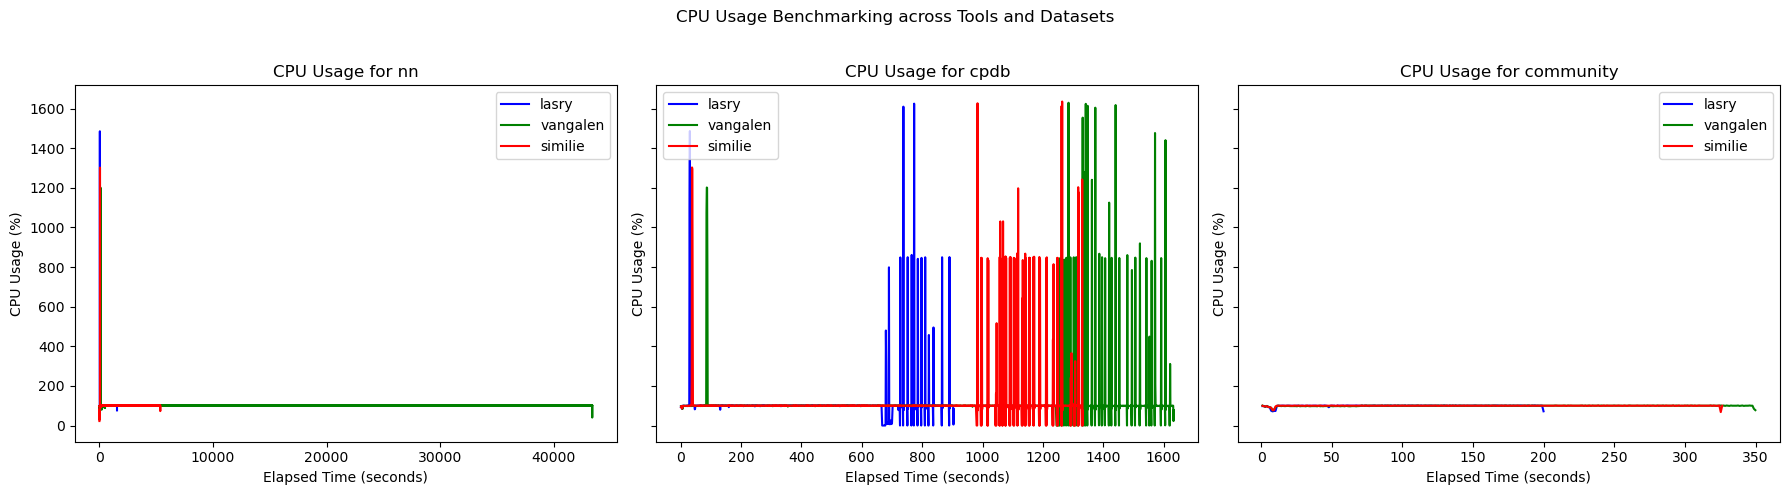

In [6]:
# Define distinct colors for each dataset
colors = {'lasry': 'b', 'vangalen': 'g', 'similie': 'r'}

# Create subplots for each tool
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Iterate through tools and datasets to plot CPU usage
for i, tool in enumerate(tools):
    for dataset in datasets:
        data = read_data(dataset, tool)
        axes[i].plot(data['Elapsed_time'], data['CPU'], label=f'{dataset}', color=colors[dataset])
    axes[i].set_xlabel('Elapsed Time (seconds)')
    axes[i].set_ylabel('CPU Usage (%)')
    axes[i].legend()
    axes[i].set_title(f'CPU Usage for {tool}')

plt.suptitle('CPU Usage Benchmarking across Tools and Datasets')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# RAM usage

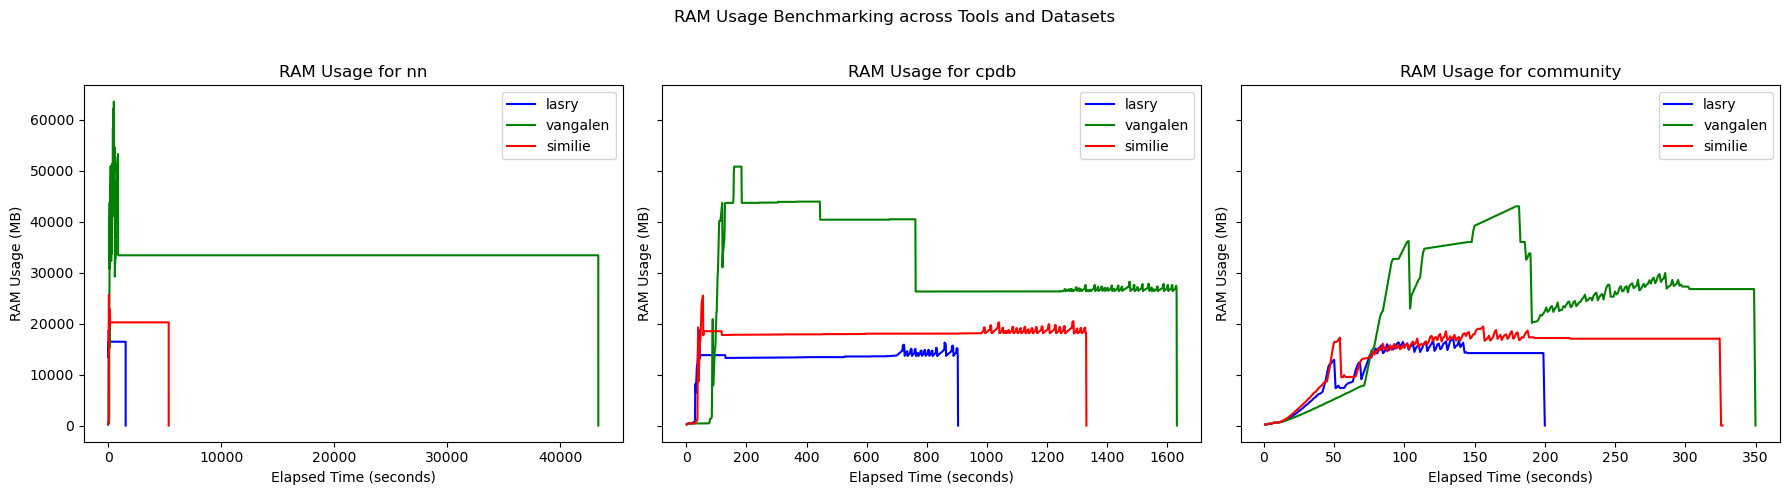

In [7]:
# Create subplots for each tool to plot RAM (Real MB) usage
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Iterate through tools and datasets to plot RAM usage
for i, tool in enumerate(tools):
    for dataset in datasets:
        data = read_data(dataset, tool)
        axes[i].plot(data['Elapsed_time'], data['Real_MB'], label=f'{dataset}', color=colors[dataset])
    axes[i].set_xlabel('Elapsed Time (seconds)')
    axes[i].set_ylabel('RAM Usage (MB)')
    axes[i].legend()
    axes[i].set_title(f'RAM Usage for {tool}')

plt.suptitle('RAM Usage Benchmarking across Tools and Datasets')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [8]:
tools = ['nn', 'cpdb', 'community', "DEGs"]

In [9]:
# Function to get the peak values for CPU and RAM usage for each tool and dataset
def get_peak_values():
    peak_values = {'Tool': [], 'Dataset': [], 'Peak_CPU': [], 'Peak_RAM_MB': [], 'Elapsed_time(sec)':[]}
    for tool in tools:
        for dataset in datasets:
            data = read_data(dataset, tool)
            peak_values['Tool'].append(tool)
            peak_values['Dataset'].append(dataset)
            peak_values['Peak_CPU'].append(data['CPU'].max())
            peak_values['Peak_RAM_MB'].append(data['Real_MB'].max())
            peak_values['Elapsed_time(sec)'].append(data['Elapsed_time'].max())
    return pd.DataFrame(peak_values)

# Get the peak values and display them in a table
peak_values_table = get_peak_values()
peak_values_table


,Tool,Dataset,Peak_CPU,Peak_RAM_MB,Elapsed_time(sec)
0,nn,lasry,1485.0,18763.355,1549.543
1,nn,vangalen,1200.7,63567.391,43379.409
2,nn,similie,1301.8,25695.684,5359.870
3,cpdb,lasry,1624.5,18702.066,904.670
4,cpdb,vangalen,1629.0,50793.500,1633.565
5,cpdb,similie,1635.2,25508.273,1332.194
6,community,lasry,101.3,17119.355,199.910
7,community,vangalen,101.1,43011.637,349.824
8,community,similie,101.1,19432.617,326.361
9,DEGs,lasry,1500.9,18638.027,74.407
